# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [221]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

In [222]:
penguins_df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [223]:
penguins_df.shape

(344, 5)

In [224]:
penguins_df = penguins_df.dropna()

In [225]:
penguins_df.shape

(335, 5)

In [226]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


In [227]:
penguins_df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

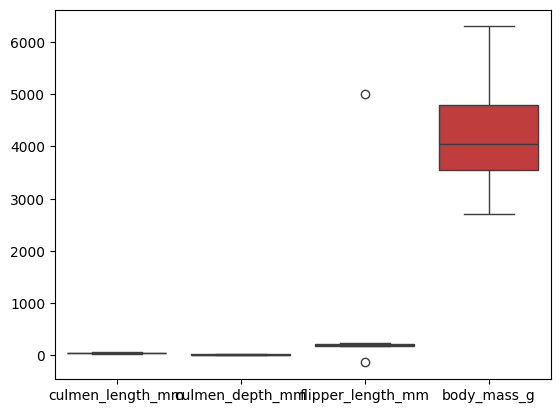

In [228]:
sns.boxplot(data = penguins_df )

plt.show()

In [229]:
q1 = penguins_df['flipper_length_mm'].quantile(0.25)
q3 = penguins_df['flipper_length_mm'].quantile(0.75)
iqr = q3 - q1

In [230]:
iqr ,q1, q3

(23.0, 190.0, 213.0)

In [231]:
upper_threshold = q3 + 1.5*iqr
lowwer_threshold = q1 - 1.5*iqr
upper_threshold , lowwer_threshold

(247.5, 155.5)

In [232]:
condition = (penguins_df['flipper_length_mm'] <= upper_threshold) & (penguins_df['flipper_length_mm'] >= lowwer_threshold)

In [233]:
np.sum(condition) , penguins_df.shape

(333, (335, 5))

In [234]:
penguins_clean = penguins_df[condition]

In [235]:
penguins_clean.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,44.022523,17.148649,201.024024,4208.483483
std,5.444308,1.958940,14.042299,805.978992
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot: >

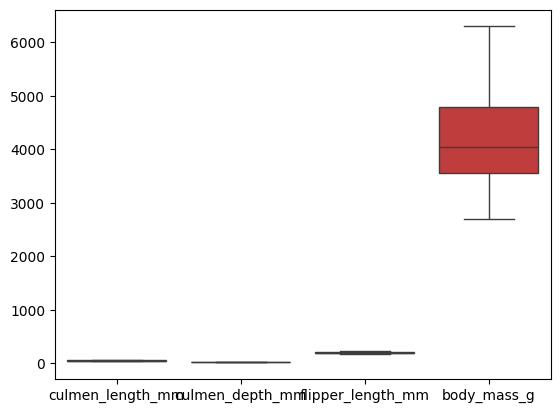

In [236]:
sns.boxplot(data = penguins_clean)

In [237]:
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [238]:
penguins_dummies = pd.get_dummies(penguins_clean , 'sex', drop_first=True)

In [239]:
penguins_dummies.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [240]:
scaler = StandardScaler()

In [241]:
penguins_preprocessed = pd.DataFrame(scaler.fit_transform(penguins_dummies))

In [242]:
penguins_preprocessed.columns = penguins_dummies.columns

In [243]:
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


In [244]:
pca = PCA()

In [245]:
pca_penguins = pca.fit_transform(penguins_preprocessed)

In [246]:
explained_variance_ratio = pca.explained_variance_ratio_

In [247]:
n_components =len( [ ratio for ratio in explained_variance_ratio if ratio > 0.1])
n_components

2

In [248]:
new_pca = PCA(n_components = n_components)

In [249]:
penguins_PCA = new_pca.fit_transform(penguins_preprocessed)

In [250]:
inertial_value = []

for i in range(1 , 11):
    kmeans = KMeans(n_clusters = i , random_state = 42)
    kmeans.fit(penguins_PCA)
    inertial_value.append(kmeans.inertia_)
    

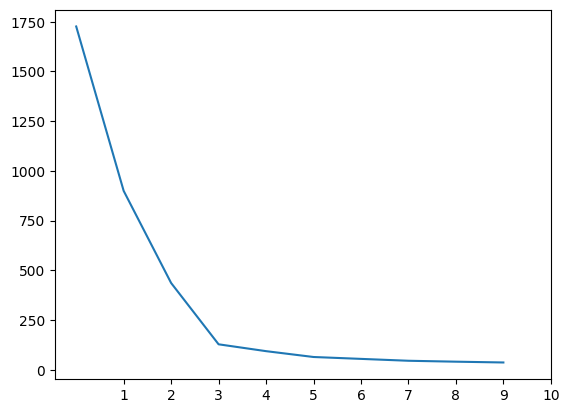

In [251]:
sns.lineplot(inertial_value )
plt.xticks(range(1 ,11))
plt.show()

In [252]:
n_clusters = 4

In [253]:
kmeans = KMeans(n_clusters = n_clusters , random_state = 42)
kmeans.fit(penguins_PCA)
label = kmeans.labels_

In [254]:
penguins_clean['label'] = label

In [255]:
stat_penguins = penguins_clean.groupby('label').mean()

In [256]:
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066


In [257]:
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,1
2,40.3,18.0,195.0,3250.0,FEMALE,1
4,36.7,19.3,193.0,3450.0,FEMALE,1
5,39.3,20.6,190.0,3650.0,MALE,0


<AxesSubplot: >

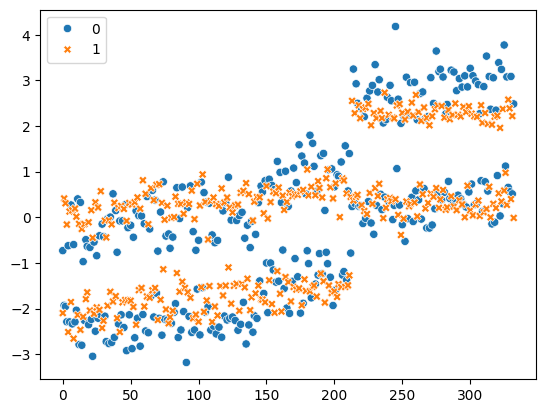

In [258]:
sns.scatterplot(penguins_PCA)